In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler #нормализатор MinMax
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Все данные по приему 2019-2022

In [2]:
raw_df_2019_2022 = pd.read_excel('data1.xlsx')
df_2019_2022 = raw_df_2019_2022.copy()

In [3]:
df_2019_2022.head()

,L_ID,B1,B1_T,B1_D,B2,B2_T,B2_D,B3,B3_T,B3_D,ИД,Балл,ЕГЭ,PK,Год
0,527156,99,1,354,96,1,1612,98,1,254,10.0,303,293.0,33,2020
1,568750,91,1,354,100,1,1612,98,1,254,10.0,299,289.0,33,2020
2,572926,99,1,354,92,1,1612,96,1,254,10.0,297,287.0,33,2020
3,551516,98,14,354,100,14,1612,97,14,254,NaN,295,NaN,9,2020
4,568369,97,1,354,100,1,1612,98,1,254,NaN,295,295.0,33,2020


In [4]:
df_2019_2022.shape

(7299, 15)

In [5]:
df_2019_2022.isnull().sum()

L_ID       0
B1         0
B1_T       0
B1_D       0
B2         0
B2_T       0
B2_D       0
B3         0
B3_T       0
B3_D       0
ИД      4237
Балл       0
ЕГЭ     2151
PK         0
Год        0
dtype: int64

In [6]:
df_2019_2022['ИД'] = df_2019_2022['ИД'].fillna(0)

In [7]:
df_2019_2022['ЕГЭ'] = df_2019_2022['ЕГЭ'].fillna(0)

In [8]:
df_2019_2022.isnull().sum()

L_ID    0
B1      0
B1_T    0
B1_D    0
B2      0
B2_T    0
B2_D    0
B3      0
B3_T    0
B3_D    0
ИД      0
Балл    0
ЕГЭ     0
PK      0
Год     0
dtype: int64

In [9]:
df_2019_2022.describe()

,L_ID,B1,B1_T,B1_D,B2,B2_T,B2_D,B3,B3_T,B3_D,ИД,Балл,ЕГЭ,PK,Год
count,7299.000000,7299.000000,7299.00000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.0,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000
mean,569183.064666,70.629401,12.56405,9686.828470,69.816413,11.412111,3795.821756,78.151391,13.272092,254.0,3.052473,221.649678,155.796410,9.154268,2020.675024
std,60971.081805,13.910849,24.91537,19017.164787,11.656039,23.455755,9945.152828,12.656625,26.159438,0.0,4.087541,31.285562,103.933759,4.881190,1.103766
min,61389.000000,39.000000,1.00000,354.000000,39.000000,1.000000,354.000000,40.000000,1.000000,254.0,0.000000,120.000000,0.000000,4.000000,2019.000000
25%,543206.500000,59.000000,1.00000,354.000000,62.000000,1.000000,1612.000000,70.000000,1.000000,254.0,0.000000,200.000000,0.000000,8.000000,2020.000000
50%,582263.000000,70.000000,1.00000,354.000000,72.000000,1.000000,1612.000000,80.000000,1.000000,254.0,0.000000,224.000000,205.000000,8.000000,2021.000000
75%,608876.000000,82.000000,14.00000,1612.000000,78.000000,14.000000,1612.000000,88.000000,14.000000,254.0,7.000000,246.000000,236.000000,8.000000,2022.000000
max,630785.000000,100.000000,84.00000,48924.000000,100.000000,84.000000,48923.000000,100.000000,84.000000,254.0,10.000000,303.000000,295.000000,33.000000,2022.000000


In [10]:
df_2019_2022.drop(columns=['B1_T', 'B1_D', 'B2_T', 'B2_D', 'B3_T', 'B3_D', 'ЕГЭ', 'PK', 'ИД'], inplace=True)

In [11]:
df_2019_2022.set_index('L_ID', inplace=True)

In [12]:
df_2019_2022

,B1,B2,B3,Балл,Год
L_ID,,,,,
527156,99,96,98,303,2020
568750,91,100,98,299,2020
572926,99,92,96,297,2020
551516,98,100,97,295,2020
568369,97,100,98,295,2020
...,...,...,...,...,...
611879,44,43,42,129,2022
615131,45,39,42,126,2022
629255,45,39,42,126,2022


# Все данные по приему 2017, 2018

In [13]:
raw_df_2017 = pd.read_excel('z123_2017.xlsx')
raw_df_2018 = pd.read_excel('z123_2018.xlsx')
df_2017 = raw_df_2017.copy()
df_2017['Год'] = 2017
df_2018 = raw_df_2018.copy()
df_2018['Год'] = 2018

In [14]:
df_2017_2018 = pd.concat([df_2017, df_2018])
df_2017_2018.head()

,lichn_id,f_id,forma_ob,perk_id,kateg,di1,dis1,oc1,ist1,tip1,...,dis2,oc2,ist2,tip2,di3,dis3,oc3,ist3,tip3,Год
0,493968,1,очная,9,Дог.,2.0,Физ.,62,4,Э+,...,Мат.,55,4,Э+,4.0,Р.яз.,56,4,Э+,2017
1,456088,1,очная,8,Оо,3.0,Хим.,71,13,Э-,...,Мат.,68,81,Оино,4.0,Р.яз.,82,81,Оино,2017
2,458515,1,очная,8,Оо,2.0,Физ.,78,13,Э-,...,Мат.,69,13,Э-,4.0,Р.яз.,69,13,Э-,2017
3,473989,1,очная,9,Дог.,2.0,Физ.,59,13,Э-,...,Мат.,66,13,Э-,4.0,Р.яз.,54,13,Э-,2017
4,456824,1,очная,8,Оо,2.0,Физ.,80,13,Э-,...,Мат.,88,81,Оино,4.0,Р.яз.,72,13,Э-,2017


In [15]:
df_2017_2018.drop(columns=['f_id', 'forma_ob', 'perk_id', 'kateg', 'di1', 
                           'dis1', 'ist1', 'tip1', 'di2', 'dis2', 
                           'ist2', 'tip2', 'di3', 'dis3', 'ist3', 'tip3' 
                           ], inplace=True)

In [16]:
df_2017_2018['Балл'] = df_2017_2018['oc1'] + df_2017_2018['oc2'] + df_2017_2018['oc3']

In [17]:
df_2017_2018

,lichn_id,oc1,oc2,oc3,Год,Балл
0,493968,62,55,56,2017,173
1,456088,71,68,82,2017,221
2,458515,78,69,69,2017,216
3,473989,59,66,54,2017,179
4,456824,80,88,72,2017,240
...,...,...,...,...,...,...
2077,517981,51,49,68,2018,168
2078,509191,51,78,69,2018,198
2079,516530,65,64,85,2018,214
2080,520397,69,47,59,2018,175


In [18]:
df_2017_2018 = df_2017_2018.rename(columns={'lichn_id': 'L_ID', 'oc1': 'B1', 'oc2': 'B2', 'oc3': 'B3'})

In [19]:
df_2017_2018

,L_ID,B1,B2,B3,Год,Балл
0,493968,62,55,56,2017,173
1,456088,71,68,82,2017,221
2,458515,78,69,69,2017,216
3,473989,59,66,54,2017,179
4,456824,80,88,72,2017,240
...,...,...,...,...,...,...
2077,517981,51,49,68,2018,168
2078,509191,51,78,69,2018,198
2079,516530,65,64,85,2018,214
2080,520397,69,47,59,2018,175


In [20]:
df_2017_2018 = df_2017_2018[['L_ID', 'B1', 'B2', 'B3', 'Балл', 'Год']]

In [21]:
df_2017_2018.set_index('L_ID', inplace=True)

In [22]:
df_2017_2018 

,B1,B2,B3,Балл,Год
L_ID,,,,,
493968,62,55,56,173,2017
456088,71,68,82,221,2017
458515,78,69,69,216,2017
473989,59,66,54,179,2017
456824,80,88,72,240,2017
...,...,...,...,...,...
517981,51,49,68,168,2018
509191,51,78,69,198,2018
516530,65,64,85,214,2018


In [23]:
df_2017_2018 = df_2017_2018[df_2017_2018['Балл'] > 100]

In [24]:
df_2017_2018 

,B1,B2,B3,Балл,Год
L_ID,,,,,
493968,62,55,56,173,2017
456088,71,68,82,221,2017
458515,78,69,69,216,2017
473989,59,66,54,179,2017
456824,80,88,72,240,2017
...,...,...,...,...,...
517981,51,49,68,168,2018
509191,51,78,69,198,2018
516530,65,64,85,214,2018


In [25]:
df = pd.concat([df_2019_2022, df_2017_2018])

In [26]:
#df.to_csv('out.csv')

# Прием Бакалавриат 2017-2019, ОФ

In [27]:
raw_df_priem = pd.read_csv('data_priem.csv')
df_priem = raw_df_priem.copy()

In [28]:
df_priem

,LICHNOST_ID,GOD_END
0,119368,2021
1,130817,2023
2,131500,2023
3,135217,2021
4,137663,2021
...,...,...
3774,547621,2023
3775,547639,2023
3776,547660,2023
3777,585764,2021


In [29]:
df_priem.set_index('LICHNOST_ID', inplace=True)
df_priem

,GOD_END
LICHNOST_ID,
119368,2021
130817,2023
131500,2023
135217,2021
137663,2021
...,...
547621,2023
547639,2023
547660,2023


# Выпуск 2021-2023, бакалавриат, ОФ

In [30]:
raw_df_vipusk = pd.read_csv('data_vipusk.csv')
df_vipusk = raw_df_vipusk.copy()

In [31]:
df_vipusk

,LICHNOST_ID,GOD_END
0,114466,2021
1,131500,2023
2,133669,2022
3,135217,2021
4,137663,2021
...,...,...
2310,600162,2023
2311,600199,2023
2312,600218,2023
2313,600236,2023


In [32]:
df_vipusk.set_index('LICHNOST_ID', inplace=True)

In [33]:
df_vipusk

,GOD_END
LICHNOST_ID,
114466,2021
131500,2023
133669,2022
135217,2021
137663,2021
...,...
600162,2023
600199,2023
600218,2023


# Отсекаем баллы только бакалавриат 2017-2019 года приема, ОФ

In [34]:
priem_ball = df.join(df_priem, how='inner')
priem_ball.drop(columns=['GOD_END'], inplace=True)
priem_ball

,B1,B2,B3,Балл,Год
119368,80,84,88,252,2017
130817,84,86,85,265,2019
131500,83,76,62,231,2019
135217,89,84,66,239,2017
137663,80,80,91,251,2017
...,...,...,...,...,...
545861,53,51,59,163,2019
545862,55,53,60,168,2019
545863,54,55,57,166,2019
545864,55,56,57,168,2019


# Смотрим баллы, кто закончил бакалавриат 2019 года приема, ОФ

In [35]:
vipusk_ball = priem_ball.join(df_vipusk, how='left')
vipusk_ball

,B1,B2,B3,Балл,Год,GOD_END
119368,80,84,88,252,2017,NaN
130817,84,86,85,265,2019,NaN
131500,83,76,62,231,2019,2023.0
135217,89,84,66,239,2017,2021.0
137663,80,80,91,251,2017,2021.0
...,...,...,...,...,...,...
545861,53,51,59,163,2019,2021.0
545862,55,53,60,168,2019,NaN
545863,54,55,57,166,2019,2021.0
545864,55,56,57,168,2019,2021.0


In [36]:
vipusk_ball['GOD_END'] = vipusk_ball['GOD_END'].fillna(0)
vipusk_ball

,B1,B2,B3,Балл,Год,GOD_END
119368,80,84,88,252,2017,0.0
130817,84,86,85,265,2019,0.0
131500,83,76,62,231,2019,2023.0
135217,89,84,66,239,2017,2021.0
137663,80,80,91,251,2017,2021.0
...,...,...,...,...,...,...
545861,53,51,59,163,2019,2021.0
545862,55,53,60,168,2019,0.0
545863,54,55,57,166,2019,2021.0
545864,55,56,57,168,2019,2021.0


In [37]:
vipusk_ball["GOD_END"].replace(2023, 1, inplace = True)
vipusk_ball["GOD_END"].replace(2022, 1, inplace = True)
vipusk_ball["GOD_END"].replace(2021, 1, inplace = True)
vipusk_ball

,B1,B2,B3,Балл,Год,GOD_END
119368,80,84,88,252,2017,0.0
130817,84,86,85,265,2019,0.0
131500,83,76,62,231,2019,1.0
135217,89,84,66,239,2017,1.0
137663,80,80,91,251,2017,1.0
...,...,...,...,...,...,...
545861,53,51,59,163,2019,1.0
545862,55,53,60,168,2019,0.0
545863,54,55,57,166,2019,1.0
545864,55,56,57,168,2019,1.0


In [38]:
vipusk_ball[vipusk_ball["GOD_END"] == 0]

,B1,B2,B3,Балл,Год,GOD_END
119368,80,84,88,252,2017,0.0
130817,84,86,85,265,2019,0.0
141884,80,60,82,222,2018,0.0
143489,58,76,62,196,2017,0.0
146752,78,76,71,235,2019,0.0
...,...,...,...,...,...,...
545837,58,55,60,173,2019,0.0
545858,60,59,70,189,2019,0.0
545859,59,54,62,175,2019,0.0
545862,55,53,60,168,2019,0.0


In [39]:
vipusk_ball[vipusk_ball["GOD_END"] == 1]

,B1,B2,B3,Балл,Год,GOD_END
131500,83,76,62,231,2019,1.0
135217,89,84,66,239,2017,1.0
137663,80,80,91,251,2017,1.0
141730,68,78,96,242,2018,1.0
143576,61,62,73,206,2019,1.0
...,...,...,...,...,...,...
545857,53,51,58,162,2019,1.0
545860,54,51,57,162,2019,1.0
545861,53,51,59,163,2019,1.0
545863,54,55,57,166,2019,1.0


In [40]:
data = vipusk_ball.rename(columns={'GOD_END': 'Выпуск'})

In [41]:
data = data[data['Год'] <= 2019]

In [42]:
data['Выпуск'].value_counts()

1.0    2010
0.0    1751
Name: Выпуск, dtype: int64

In [43]:
data.describe()

,B1,B2,B3,Балл,Год,Выпуск
count,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000
mean,72.612071,72.822122,80.653815,227.008774,2017.976602,0.534432
std,12.213580,10.353384,11.281519,25.045516,0.821898,0.498879
min,50.000000,46.000000,54.000000,153.000000,2017.000000,0.000000
25%,62.000000,68.000000,72.000000,210.000000,2017.000000,0.000000
50%,73.000000,74.000000,82.000000,229.000000,2018.000000,1.000000
75%,82.000000,80.000000,89.000000,245.000000,2019.000000,1.000000
max,100.000000,100.000000,100.000000,294.000000,2019.000000,1.000000


In [44]:
data[data['Выпуск'] == 1].describe()

,B1,B2,B3,Балл,Год,Выпуск
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.0
mean,73.453234,73.711940,82.798010,230.943284,2017.965672,1.0
std,12.211063,10.132674,10.304667,24.646566,0.812616,0.0
min,50.000000,47.000000,54.000000,157.000000,2017.000000,1.0
25%,63.000000,68.000000,76.000000,215.000000,2017.000000,1.0
50%,74.000000,74.000000,85.000000,233.000000,2018.000000,1.0
75%,83.000000,80.000000,91.000000,248.000000,2019.000000,1.0
max,100.000000,100.000000,100.000000,294.000000,2019.000000,1.0


In [45]:
data[data['Выпуск'] == 0].describe()

,B1,B2,B3,Балл,Год,Выпуск
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.0
mean,71.646488,71.800685,78.192461,222.492290,2017.989149,0.0
std,12.148326,10.511475,11.841046,24.742764,0.832481,0.0
min,50.000000,46.000000,54.000000,153.000000,2017.000000,0.0
25%,61.000000,65.000000,69.000000,205.000000,2017.000000,0.0
50%,72.000000,72.000000,78.000000,223.000000,2018.000000,0.0
75%,81.000000,79.000000,88.000000,241.000000,2019.000000,0.0
max,100.000000,100.000000,100.000000,289.000000,2019.000000,0.0


In [46]:
data.to_csv('out.csv')

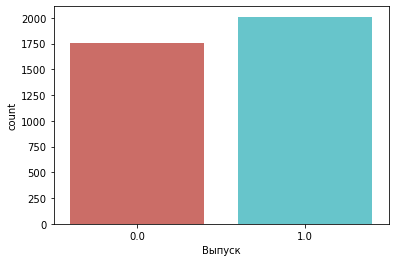

In [47]:
sns.countplot(x='Выпуск', data=data, palette='hls')
plt.show()

<AxesSubplot:xlabel='Балл', ylabel='Probability'>

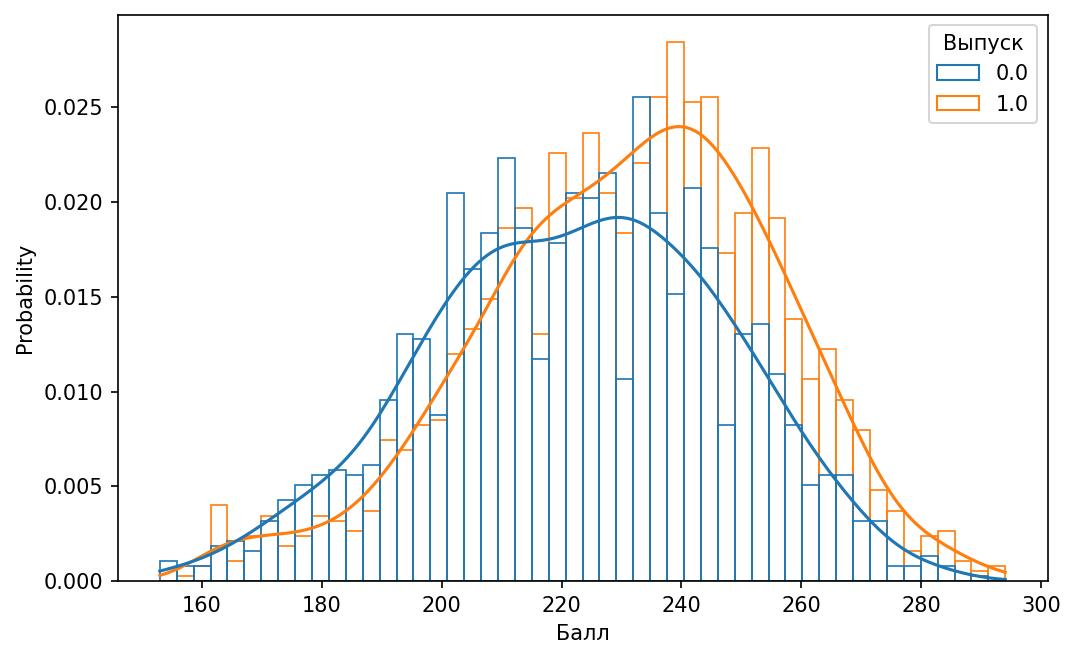

In [48]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
sns.histplot(data=data, 
            x='Балл', 
            alpha = .7, 
            legend='full',
             hue='Выпуск',
            bins=50,
            kde = True,
            stat = 'probability',
             fill=False
            )

Text(0.5, 1.0, 'Год приема 2019')

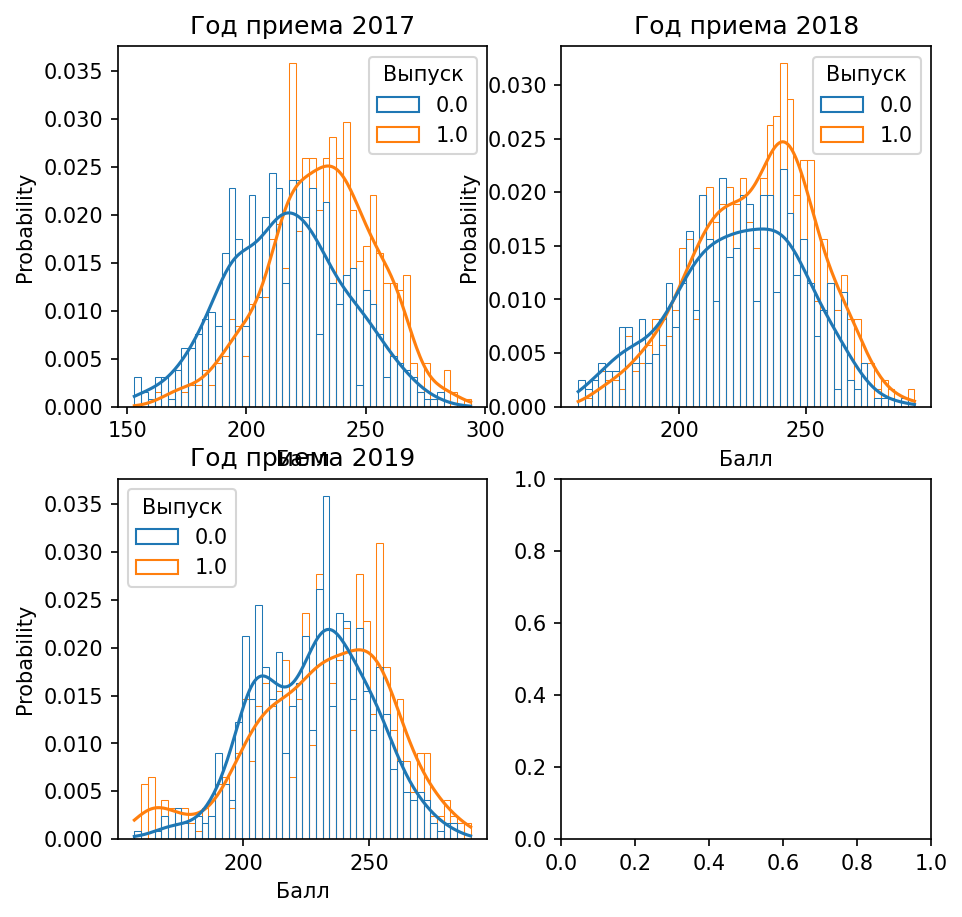

In [49]:
fig, ax = plt.subplots(2, 2, dpi=150, figsize=(7, 7))
sns.histplot(data=data[data['Год']==2017], 
            x='Балл', 
            alpha = .7, 
            legend='full',
             hue='Выпуск',
            bins=50,
            kde = True,
            stat = 'probability',
             fill=False,
             ax=ax[0, 0]
            ).set_title("Год приема 2017")
sns.histplot(data=data[data['Год']==2018], 
            x='Балл', 
            alpha = .7, 
            #legend='full',
             hue='Выпуск',
            bins=50,
            kde = True,
            stat = 'probability',
             fill=False,
             ax=ax[0, 1]
            ).set_title("Год приема 2018")
sns.histplot(data=data[data['Год']==2019], 
            x='Балл', 
            alpha = .7, 
            legend='full',
             hue='Выпуск',
            bins=50,
            kde = True,
            stat = 'probability',
             fill=False,
             ax=ax[1, 0]
            ).set_title("Год приема 2019")

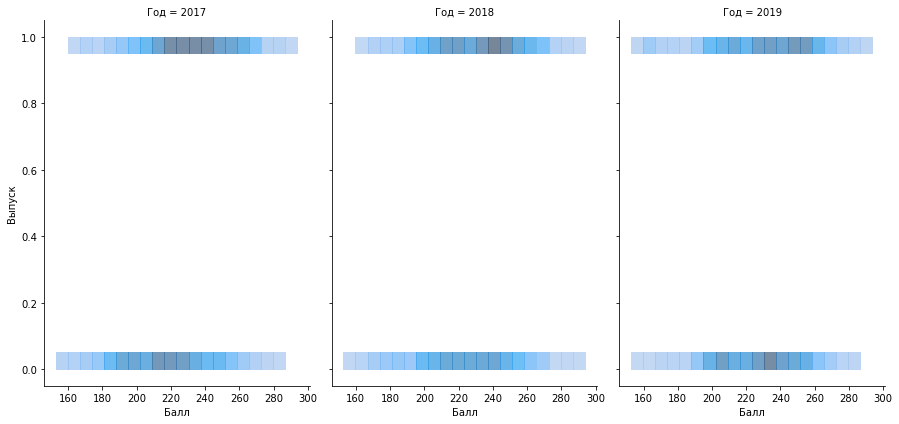

In [50]:
sns.displot(data=data, 
            x='Балл',
            y='Выпуск', 
            alpha = .7, 
            legend='full',
            col='Год',
            col_wrap=3,
            #stat='density',
            height=6, 
            bins=20,
            aspect=0.7)

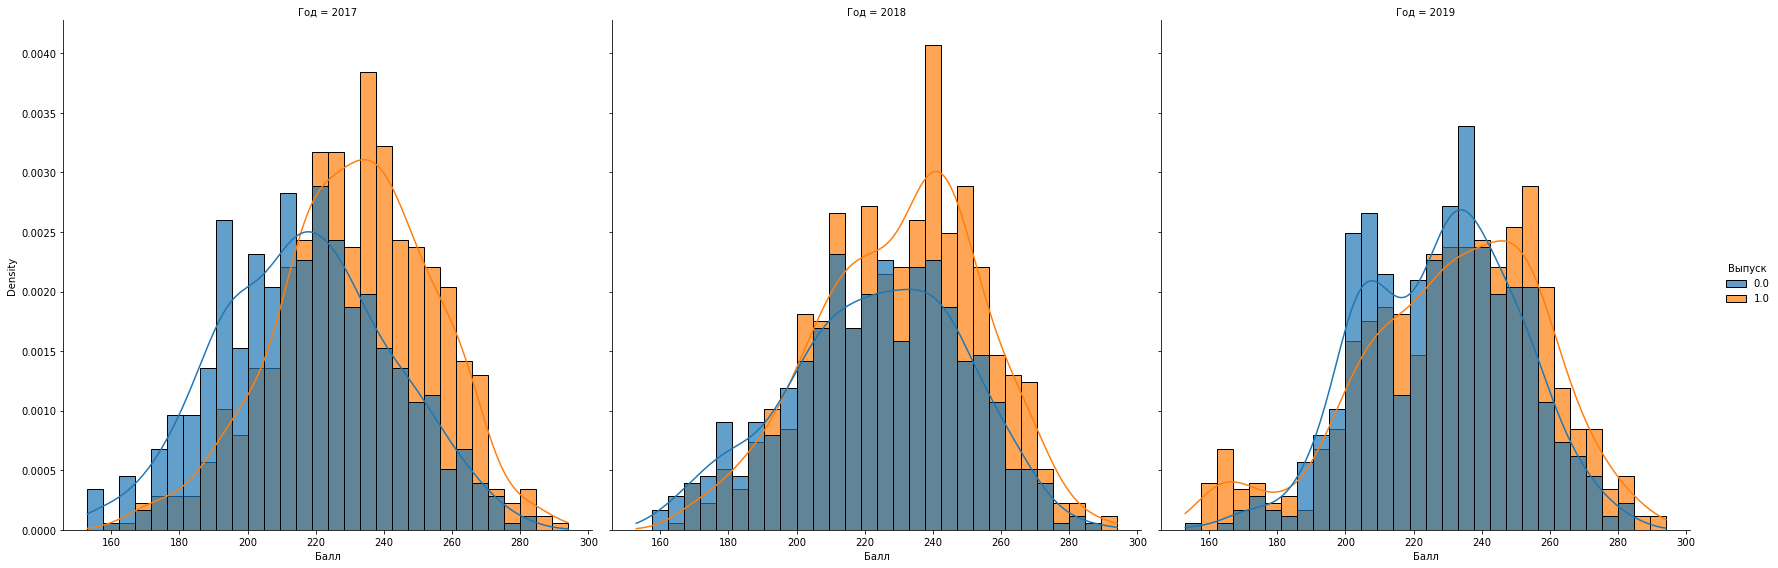

In [51]:
sns.displot(data=data, 
            x='Балл', 
            alpha = .7, 
            legend='full',
            col='Год',
            hue='Выпуск',
            stat='density',
            kde=True,
            height=8,
            bins=30,
            aspect=1)

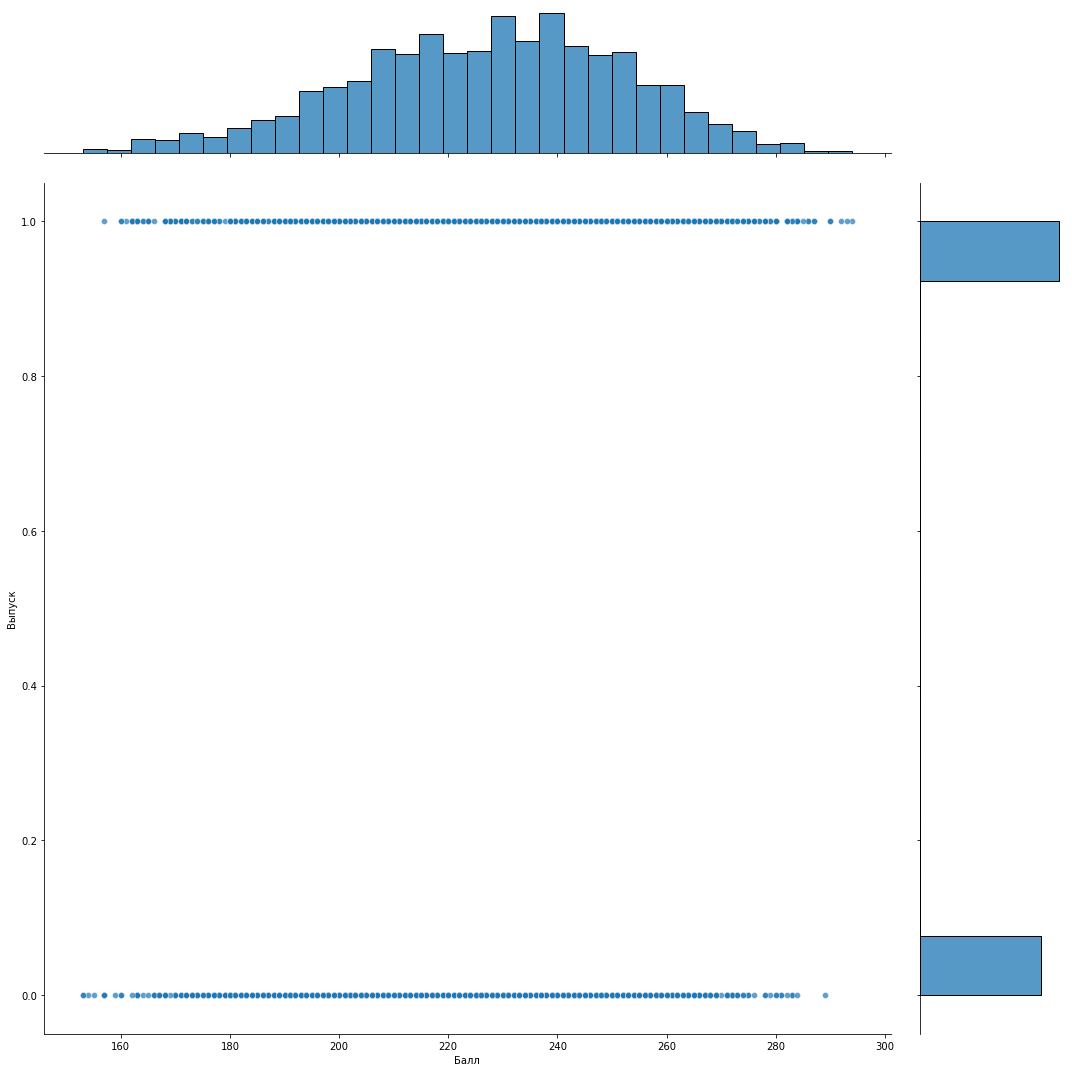

In [52]:
sns.jointplot(data=data, 
            x='Балл',
            y='Выпуск', 
            alpha = .7, 
            legend='full',
            #stat='density',
            height=15
           )

In [53]:
corr = data.corr() #смотрим корреляционную матрицу
corr

,B1,B2,B3,Балл,Год,Выпуск
B1,1.000000,0.353474,0.258627,0.756162,0.047951,0.073799
B2,0.353474,1.000000,0.281087,0.723433,-0.074719,0.092094
B3,0.258627,0.281087,1.000000,0.695915,0.097681,0.203662
Балл,0.756162,0.723433,0.695915,1.000000,0.082285,0.168335
Год,0.047951,-0.074719,0.097681,0.082285,1.000000,-0.014250
Выпуск,0.073799,0.092094,0.203662,0.168335,-0.014250,1.000000


<AxesSubplot:>

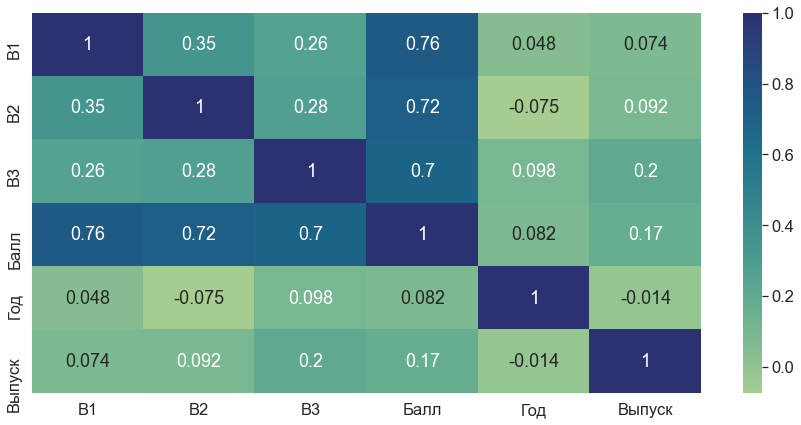

In [54]:
sns.set(font_scale=1.5) 
f, ax = plt.subplots(figsize=(15,7)) # выводим heatmap для корреляционной матрицы
sns.heatmap(corr, annot=True, ax=ax, cmap="crest")

# Разделение выборки на тестовую и валидационную

In [55]:
y = np.array(data[["Выпуск"]])

In [56]:
X = np.array(data[["Балл"]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Логистическая регрессия

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\seismopro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [59]:
log_odds = logreg.coef_
log_odds

array([[0.01496196]])

In [60]:
log_intercept = logreg.intercept_
log_intercept

array([-3.22237809])

In [61]:
X_crit = - log_intercept / log_odds
X_crit

array([[215.37140531]])

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(- (log_odds * x + log_intercept)))

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [64]:
X_test

array([[240],
       [246],
       [267],
       ...,
       [231],
       [211],
       [243]], dtype=int64)

In [65]:
pred_proba = logreg.predict_proba(X_test)
pred_proba

array([[0.40890545, 0.59109455],
       [0.38739779, 0.61260221],
       [0.31594614, 0.68405386],
       ...,
       [0.44180632, 0.55819368],
       [0.51634537, 0.48365463],
       [0.39810244, 0.60189756]])

In [66]:
pred_proba = pred_proba[:, 1]
pred_proba

array([0.59109455, 0.61260221, 0.68405386, ..., 0.55819368, 0.48365463,
       0.60189756])

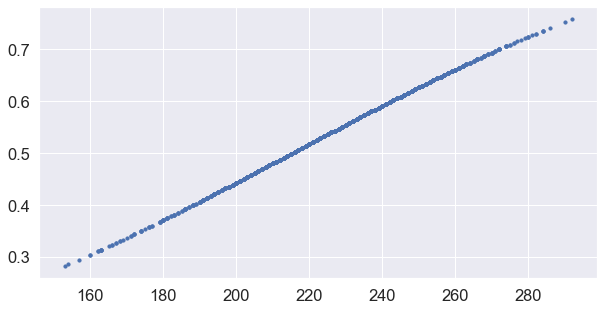

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, pred_proba,  s=10)

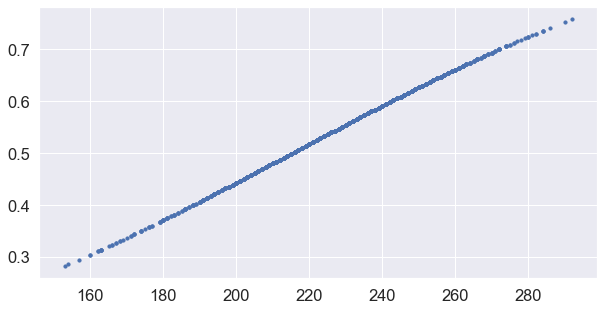

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, sigmoid(X_test),  s=10)

<AxesSubplot:>

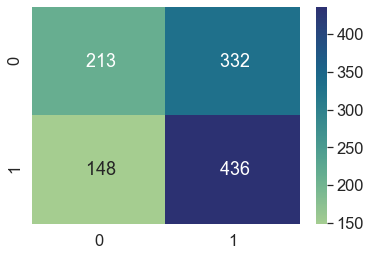

In [69]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt = '4.0f', cmap="crest")

C:\Users\seismopro\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<AxesSubplot:>

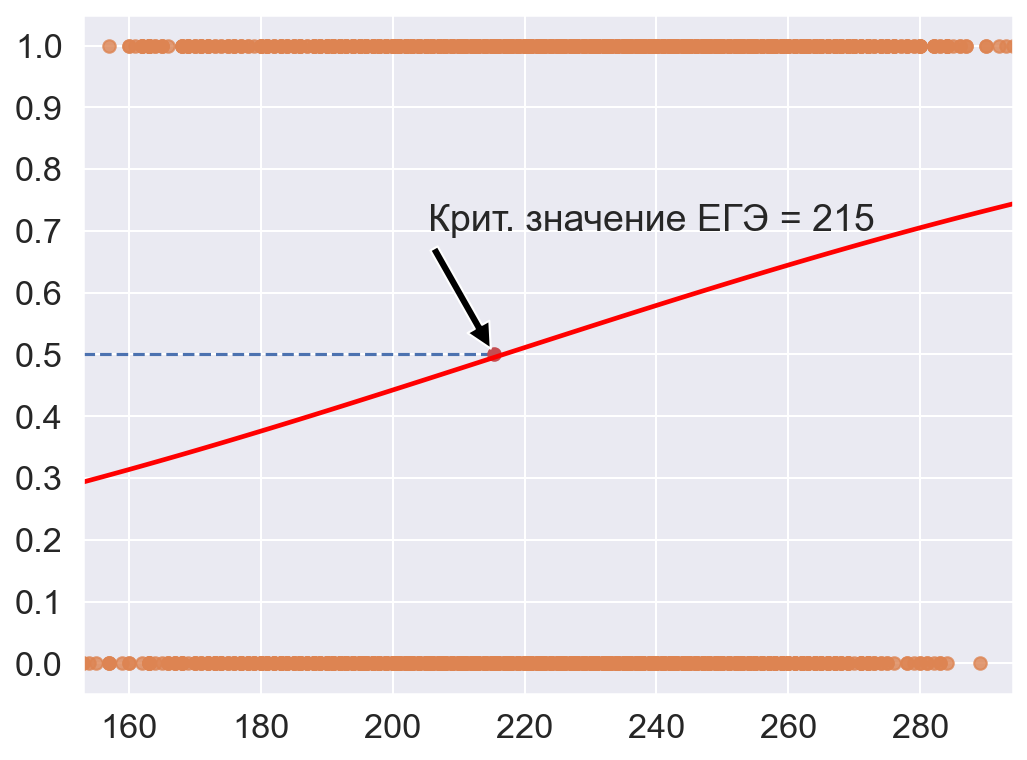

In [70]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
#plt.plot([min(X), max(X)], [0, 1],'r--')
plt.plot([min(X), X_crit], [0.5, 0.5],'--')
plt.locator_params(axis='y', nbins= 20)
plt.plot(X_crit, 0.5, 'ro')
plt.annotate("Крит. значение ЕГЭ = %.0f"%(X_crit), xy=(X_crit, 0.5), xytext=(X_crit-10, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
sns.regplot(x=X, y=y, logistic=True, ci=None, line_kws={'color': 'red'})

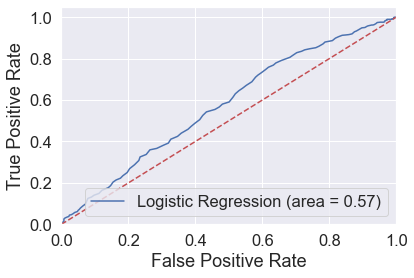

In [71]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
data = data[data['Год']==2017]

# Разделение выборки на тестовую и валидационную

In [73]:
y = np.array(data[["Выпуск"]])

In [74]:
X = np.array(data[["Балл"]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Логистическая регрессия

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\seismopro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [77]:
log_odds = logreg.coef_
log_odds

array([[0.02599339]])

In [78]:
log_intercept = logreg.intercept_
log_intercept

array([-5.6493515])

In [79]:
X_crit = - log_intercept / log_odds
X_crit

array([[217.33798579]])

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(- (log_odds * x + log_intercept)))

In [81]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [82]:
pred_proba = logreg.predict_proba(X_test)

In [83]:
pred_proba = pred_proba[:, 1]

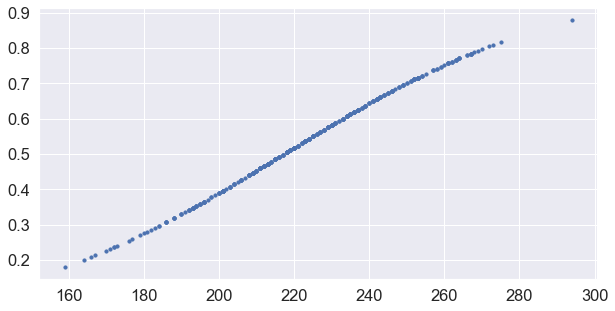

In [84]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, pred_proba,  s=10)

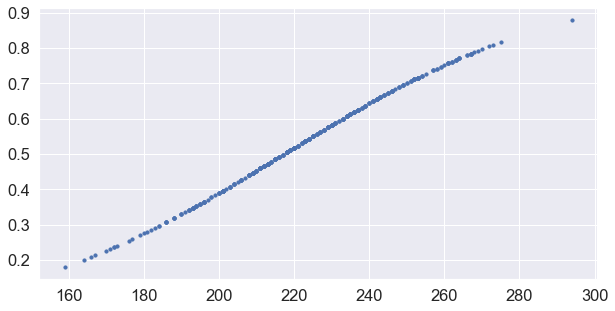

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, sigmoid(X_test),  s=10)

C:\Users\seismopro\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<AxesSubplot:>

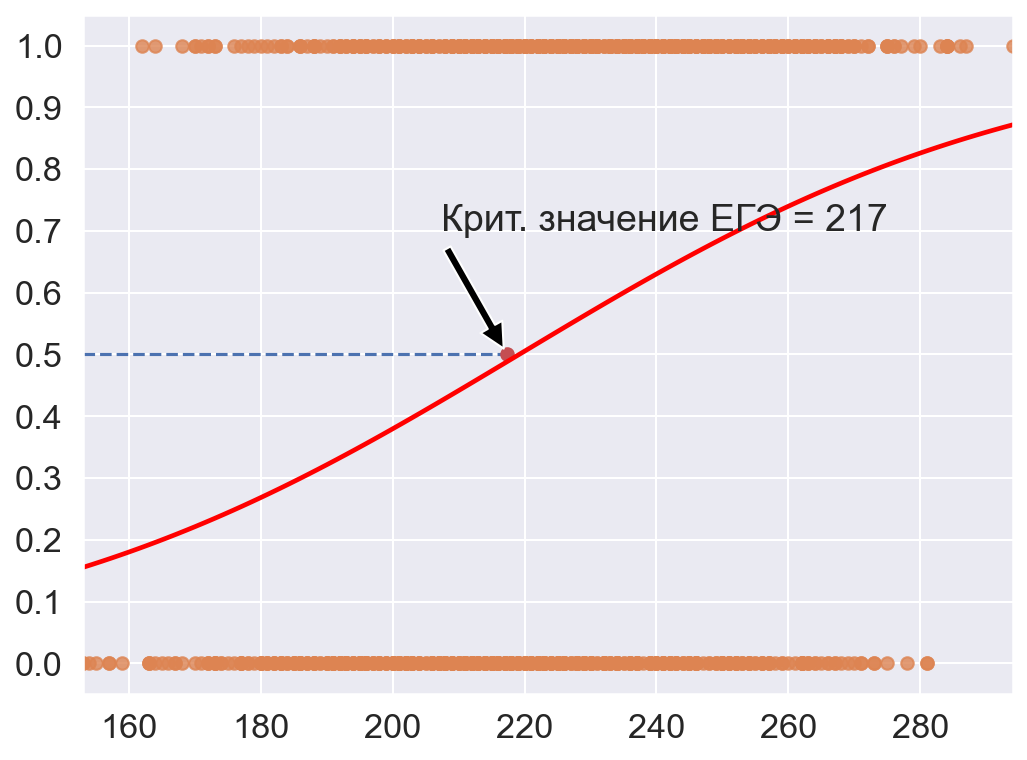

In [86]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
#plt.plot([min(X), max(X)], [0, 1],'r--')
plt.plot([min(X), X_crit], [0.5, 0.5],'--')
plt.locator_params(axis='y', nbins= 20)
plt.plot(X_crit, 0.5, 'ro')
plt.annotate("Крит. значение ЕГЭ = %.0f"%(X_crit), xy=(X_crit, 0.5), xytext=(X_crit-10, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
sns.regplot(x=X, y=y, logistic=True, ci=None, line_kws={'color': 'red'})

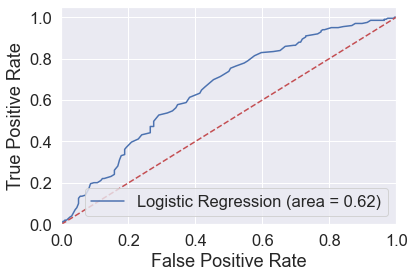

In [87]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()